In [62]:

import numpy as np
from netCDF4 import Dataset 
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
import urllib
import json

cor=pd.read_excel('confinement_index_code/confinement index 20April2020.xlsx',header=2,usecols='J:L',nrows=228)
cc_code=cor['country code']
cc_name=cor['Index scale']


In [63]:
c_c=np.load('google_cg_high_ex.npy') #Google mobility based trends
#c_c=np.load('corinne_c_low.npy') #or corrine_c for orignal data from Excel countries Edgar.ipynb
c_us=np.load('corinne_cus.npy')
c_china=np.load('corinne_cchina.npy')
b_c=np.load('corinne_b.npy')
b_us=np.load('corinne_bus.npy')
b_china=np.load('corinne_bchina.npy')

#b_c[:,:,49]=1E-10
# trans,red,pub,ind,ship,avi,avn

In [64]:
b_c[0,:,:143].sum()*356/1000

34.43557985097689

In [65]:
for i in range(143):
    print (cc_name[i],b_c[0,2,i]/b_c[0,:,i].sum(axis=0)*100,b_c[0,1,i]/b_c[0,:,i].sum(axis=0)*100)

Albania 8.576997925698947 5.068226458930936
Algeria 2.761341361726443 15.384614805025706
Angola 8.900998990037598 7.175295496462139
Argentina 7.953443754701689 11.54219293048013
Armenia 10.465116747430923 22.09302268432741
Australia 3.2692309054249766 2.307692367225855
Austria 2.901353892847352 9.767891805226272
Azerbaijan 4.906771108243987 17.46810567129402
Bahrain 0.0 0.8530805289260585
Bangladesh 4.808635776834581 11.285574484930178
Belarus 4.671967957682859 7.952286094107221
Belgium 7.164633758374789 13.03353751129449
Benin 0.5923001487627145 1.283316995097591
Bolivia 18.79327341360916 5.934718118817195
Bosnia and Herzegovina 1.7982016230137459 2.8971026801448767
Botswana 1.4925372752711024 0.3980099559286421
Brazil 3.660885974252431 3.949903642392103
Brunei Darussalam 1.1605416376976625 1.353965200793403
Bulgaria 1.7612523842738887 1.859099821984897
Cambodia 4.377432025156852 1.4591438758557163
Cameroon 1.3888889537568738 6.746032431136601
Canada 10.059761133478027 6.8725095764533

In [66]:
b_c.shape

fracs=c_c/b_c

sectors=['surface-transport','residential','public/commercial','industry',
         'international-shipping','international-aviation','domestic-aviation','power']
jday=np.arange(366)+1
cols=jday.tolist()
colsw=['Country','ISO_A3','Sector','Base(MtCO2/day)','Base%']+jday.tolist()
#for i in range(8):
df=pd.DataFrame(data=np.transpose(fracs[:,0,:]), columns=cols)
df['Country']=cc_name[:143]
df['ISO_A3']=cc_code[:143]
df['Sector']=cc_code[:143]
df['Base(MtCO2/day)']=b_c[0,0,:]
df['Base%']=b_c[0,0,:143]/b_c[0,:,:143].sum(axis=0)*100
df['Sector'][:]=sectors[0]
#df.to_csv('Robin_sectors.csv',columns=colsw, header=True)
for i in range(1,8):
    df2=pd.DataFrame(data=np.transpose(fracs[:,i,:]), columns=cols)
    df2['Country']=cc_name[:143]
    df2['ISO_A3']=cc_code[:143]
    df2['Sector']=cc_code[:143]
    df2['Sector'][:]=sectors[i]
    df2['Base(MtCO2/day)']=b_c[0,i,:]
    df2['Base%']=b_c[0,i,:143]/b_c[0,:,:143].sum(axis=0)*100
    df = pd.concat([df, df2])
df.to_csv('Robin_sectors_V3.csv',columns=colsw,header=True)





/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/earpmf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [67]:
# residential and commerical fractions (%) by country to split EDGAR data
#
fr=100*b_c[0,1,:143]/(b_c[0,1,:143]+b_c[0,2,:143])
fc=100*b_c[0,2,:143]/(b_c[0,1,:143]+b_c[0,2,:143])
#for i in range(143):
#    print (cc_name[i],fr[i],fc[i])

z=np.zeros(2)
fr =np.concatenate((fr,z))
fc =np.concatenate((fc,z))

print (fc)

[62.85714096 15.21739244 55.36723029 40.79601956 32.14285868 58.62069004
 22.9007627  21.92982405  0.         29.87804744 37.0078734  35.47169525
 31.57894727 75.99999939 38.29787181 78.94736776 48.10126358 46.15384695
 48.64864753 75.0000017  17.07316996 59.41176648 49.45055213 41.45860857
 65.90908868 28.00000263 80.67226839 60.         45.34161371 80.3418793
  0.         35.52631874 35.48387147 96.79487186  0.         50.3937017
 24.69135753 60.8433756  15.9090919   5.00000017 15.85365871 78.26086936
 70.43478104 70.65217229 46.27451228 49.51456243 21.24999941 34.4262306
 43.42105122 50.         24.73118301  1.81818183  1.23456798 57.1428586
 50.         35.76923328 98.1617646  51.31579011 33.33333333 21.36752186
  0.         30.84112169 86.84210558 34.41860484 82.69230899 55.65217494
 38.26086834 36.73469309 16.8421053  41.05263199 84.48275946  0.
  9.36863557 63.06818487 11.11111111  0.         43.22033939 36.45833393
 64.10256498 71.13401942 27.65957269 47.05882698 39.1304342  42

In [68]:
b_c[:,:,49]=1E-10 #gibralter is not wanted but this prevents nans

In [69]:
b_c=np.where(b_c ==0.0,1E-10,b_c)

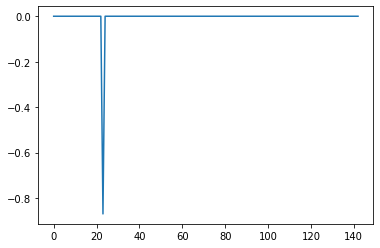

In [70]:
pl.plot(c_c[26,0,:]-c_c[15,0,:])

In [71]:
c_c[100,:,:].sum()

-27.102126201447177

In [72]:
dfd = pd.read_excel('EDGAR/v50_SO2_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('SO2_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,7.31333,58.9124,21.9257,9.13676,5.399,0,7.53526
1,DZA,Algeria,44.4921,28.2735,16.4133,3.14551,17.525,0.173662,78.7476
2,AGO,Angola,52.243,9.72764,4.95511,17.2423,13.8994,0.373009,67.3078
3,ARG,Argentina,68.8705,19.2829,4.27767,2.61729,3.79827,0.1039,488.212
4,ARM,Armenia,0.760302,35.3905,36.4021,7.1735,15.144,0,0.897751
5,AUS,Australia,55.3965,34.3414,2.86889,0.807531,0.570022,0.31586,960.504
6,AUT,Austria,22.8686,58.6052,0.318037,1.49329,5.02741,0.0680384,47.0364
7,AZE,Azerbaijan,86.0471,5.08514,10.5379,0.733166,2.61007,0.501422,38.8248
8,BHR,Bahrain,5.51823,73.7555,9.56145,0,11.1359,0.44958,7.843
9,BGD,Bangladesh,49.6529,28.6655,10.3065,3.28431,7.70807,0,225.966


In [73]:
dfd = pd.read_excel('EDGAR/v50_BC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('BC_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.359464,8.72021,49.5809,23.5428,13.9116,0,0.9586
1,DZA,Algeria,3.66506,7.12742,88.3841,0.127739,0.71169,0.0723202,6.99586
2,AGO,Angola,28.2075,2.47577,11.912,28.0216,22.5888,0.0492876,18.8454
3,ARG,Argentina,7.12735,15.8985,24.3639,1.17673,1.7077,0.061371,30.5787
4,ARM,Armenia,0.0636456,0.529425,11.9311,25.1418,53.077,0,0.522974
5,AUS,Australia,4.07618,41.5234,22.5208,4.25198,3.0014,0.34672,32.3722
6,AUT,Austria,6.26281,24.0743,35.8281,7.75776,26.1178,0.0292745,4.04442
7,AZE,Azerbaijan,7.98767,5.0576,47.7325,3.35273,11.9357,0.770517,0.934734
8,BHR,Bahrain,4.37082,39.0161,54.2439,0,1.79824,0.896716,0.145477
9,BGD,Bangladesh,2.18841,3.80396,9.89805,21.8712,51.3304,0,31.5423


In [74]:
dfd = pd.read_excel('EDGAR/v50_OC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('OC_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0562195,1.28842,16.6305,42.5529,25.1449,0,1.90521
1,DZA,Algeria,2.37223,3.69322,85.4766,0.583971,3.25355,0.0472879,5.37544
2,AGO,Angola,1.30742,0.780481,3.15881,42.7697,34.4776,0.00911278,51.21
3,ARG,Argentina,0.727925,1.17912,4.64201,1.77938,2.58227,0.0079431,118.702
4,ARM,Armenia,0.0685992,0.399111,3.33515,26.1229,55.1483,0,1.83302
5,AUS,Australia,0.759466,4.39546,7.51579,7.32048,5.1674,0.0870473,64.7828
6,AUT,Austria,1.2877,9.16357,16.9608,14.8019,49.833,0.00888896,6.69205
7,AZE,Azerbaijan,2.06905,1.74145,13.6991,5.65774,20.1416,0.162684,2.22428
8,BHR,Bahrain,33.2673,17.6321,54.4533,0,3.31648,0.459084,0.142764
9,BGD,Bangladesh,0.161655,4.75225,1.96554,21.5263,50.521,0,120.654


In [75]:
dfd = pd.read_excel('EDGAR/v50_NOx_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('NOx_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.473443,14.3195,71.6197,2.46878,1.45882,0,26.9633
1,DZA,Algeria,30.1889,7.04376,57.8987,0.848245,4.72593,0.30942,449.399
2,AGO,Angola,27.8248,4.97422,49.1634,5.55467,4.47774,1.46511,174.242
3,ARG,Argentina,18.8079,14.4279,45.6893,2.18382,3.1692,0.595628,865.943
4,ARM,Armenia,10.4905,6.75329,65.0749,3.92565,8.28748,0,19.3718
5,AUS,Australia,41.6464,16.2743,28.8521,1.10426,0.779478,2.23701,1379
6,AUT,Austria,12.981,20.9232,54.2353,1.82494,6.14398,0.200219,162.526
7,AZE,Azerbaijan,30.4775,5.95571,45.7665,2.30051,8.18982,2.41108,82.0991
8,BHR,Bahrain,73.9625,10.5416,16.4667,0,0.485758,0.598222,59.9332
9,BGD,Bangladesh,43.0135,14.5422,25.2361,2.16731,5.08655,0,518.987


In [76]:
dfd = pd.read_excel('EDGAR/v50_NH3_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('NH3_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0085367,0.0551272,0.467574,0.94032,0.555644,0,39.4425
1,DZA,Algeria,0.451768,0.41122,2.38173,0.0559529,0.311738,0.0287828,73.3885
2,AGO,Angola,19.7045,0.492099,0.031781,13.9439,11.2405,0.0329685,117.627
3,ARG,Argentina,1.64859,1.15113,0.632665,0.306487,0.44478,0.0151746,516.331
4,ARM,Armenia,0.00094787,0.00570268,2.09477,2.56149,5.40759,0,15.0513
5,AUS,Australia,0.156597,1.27302,1.86726,0.68898,0.486339,0.0811019,577.807
6,AUT,Austria,0.362568,1.88355,2.11289,0.650651,2.19052,0.00498523,99.1568
7,AZE,Azerbaijan,0.399258,0.0191784,0.879918,0.165905,0.59062,0.0497494,60.4426
8,BHR,Bahrain,3.77437,55.0153,23.6559,0,0.935691,0.395268,1.3779
9,BGD,Bangladesh,0.527854,0.498102,0.183888,4.01372,9.41995,0,502.212


In [77]:
dfd = pd.read_excel('EDGAR/v50_CO_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('CO_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0675596,7.45486,37.6778,30.729,18.158,0,76.0751
1,DZA,Algeria,21.4319,3.79707,75.7894,0.30009,1.67193,0.0718721,639.3
2,AGO,Angola,27.6202,0.402154,22.7351,23.4499,18.9035,0.034971,2412.12
3,ARG,Argentina,3.27664,3.49161,42.1145,0.759442,1.10212,0.0229759,7417.82
4,ARM,Armenia,0.525874,0.333241,24.7209,21.0553,44.45,0,63.4307
5,AUS,Australia,6.36197,14.018,34.1098,4.97333,3.51059,0.36255,2811.57
6,AUT,Austria,5.58505,31.9651,8.30392,11.8676,39.9543,0.0158041,680.363
7,AZE,Azerbaijan,9.83581,7.37882,58.8119,2.26913,8.07809,0.36945,177.043
8,BHR,Bahrain,16.9015,72.8999,11.3668,0,0.0959371,0.0594091,199.416
9,BGD,Bangladesh,4.31656,6.03981,12.0894,19.6806,46.1892,0,3545.95


In [78]:
dfd = pd.read_excel('EDGAR/v50_NMVOC_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]


cats_inPo=['Main Activity Electricity and Heat Production','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Solid Fuels','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry','Cement production','Lime production','Glass Production','Other Process Uses of Carbonates']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation no resuspension','Road Transportation resuspension','Railways','Water-borne Navigation','Other Transportation']

cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co)]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic] 
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('NMVOC_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,5.2257,2.74376,26.1762,6.7852,4.00944,0,30.3645
1,DZA,Algeria,55.4008,1.05198,23.969,0.0884144,0.492595,0.00298539,713.48
2,AGO,Angola,63.9027,0.334162,10.6119,9.27599,7.47758,0.00397424,983.946
3,ARG,Argentina,18.0803,4.99296,41.2883,0.974029,1.41353,0.00795528,993.141
4,ARM,Armenia,2.47961,0.737624,20.6704,6.83091,14.4208,0,32.5851
5,AUS,Australia,38.719,5.29278,18.4101,2.41875,1.70735,0.0500991,943.202
6,AUT,Austria,12.5143,11.1997,6.33566,5.05244,17.0099,0.00355968,140.029
7,AZE,Azerbaijan,33.9669,0.52061,30.8969,0.435186,1.54926,0.0170251,178.1
8,BHR,Bahrain,61.5394,3.05888,21.7707,0,0.138659,0.0122067,44.9918
9,BGD,Bangladesh,4.53442,2.81809,5.75048,12.3473,28.9783,0,1005.68


In [79]:
dfd = pd.read_excel('EDGAR/v50_CH4_1970_2015c.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
#    print (i)
#    print (dfd.ISO_A3)
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]
cats_inPo=['Main Activity Electricity and Heat Production','Solid Fuels','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation','Railways','Water-borne Navigation','Other Transportation']
cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co).values[:]]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories           
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('CH4_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,5.43322,0.0939899,0.161158,1.33277,0.787546,0,117.436
1,DZA,Algeria,78.9948,0.0194459,0.11185,0.00910227,0.0507127,9.40649e-05,3034.6
2,AGO,Angola,67.3495,0.0130278,0.0979057,2.0346,1.64014,0.000303172,1728.56
3,ARG,Argentina,17.5628,0.0709268,0.313092,0.0751188,0.109014,0.000214118,4944.94
4,ARM,Armenia,16.2644,0.00774452,1.32883,0.944408,1.99375,0,96.177
5,AUS,Australia,50.6068,0.0865389,0.113707,0.124385,0.0878009,0.000798196,7933.64
6,AUT,Austria,18.9035,0.664513,0.285168,1.37015,4.61284,0.000167436,398.958
7,AZE,Azerbaijan,50.4083,0.00834961,0.0719928,0.0445116,0.158461,0.000535881,758.284
8,BHR,Bahrain,89.4516,0.420164,0.101279,0,0.0116918,0.000319599,230.289
9,BGD,Bangladesh,7.26427,0.0208765,0.103934,0.919826,2.15878,0,4853.24


In [80]:
dfd = pd.read_excel('EDGAR/v50_N2O_1970_2015.xls',header=9)
dfd['2015']=dfd[2015]
dfd.drop(dfd.columns.difference(['ISO_A3','Name','IPCC_description','2015']), 1, inplace=True)
cc_want=cc_code[0:143].values[:].tolist()+['AIR','SEA']
cc_nwant=cc_name[0:143].values[:].tolist()+['IntlAIR','IntlSEA']
#for i in dfd.ISO_A3.unique():
for i in cc_want:
#    print (i)
#    print (dfd.ISO_A3)
    total=dfd.copy()[dfd.ISO_A3.str.contains(i)]['2015'].sum()
#    print (i,total)
df_out=pd.DataFrame(columns=['ISO_A3','Name','Power','Industry','Surface_Transport','Public','Residential','Aviation','Total'])
df_out['ISO_A3']=cc_want
df_out['Name']=cc_nwant  


#dfd[dfd.Name.str.contains('Canada')]
cats_inPo=['Main Activity Electricity and Heat Production','Solid Fuels','Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries','Oil and Natural Gas']
cats_inPu=''
cats_inI=['Manufacturing Industries and Construction','Chemical Industry','Metal Industry']
cats_inA='Civil Aviation'
cats_inS=['Road Transportation','Railways','Water-borne Navigation','Other Transportation']
cats_inR='Other Sectors'
ic=-1
for co in cc_want:
        ic=ic+1
#        print (co,dfd.copy()[dfd.ISO_A3.str.contains(i)])
        sub =dfd[dfd.ISO_A3.str.contains(co).values[:]]
        total=sub['2015'].sum()  #total country emissions
        if total > 0:
            df_out.loc[df_out.ISO_A3.str.contains(co),'Total'] = total
            s=0.0
            for i in cats_inS:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Surface_Transport'] = s/total*100.0
            s=0.0
            for i in cats_inPo:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories
            df_out.loc[df_out.ISO_A3.str.contains(co),'Power'] = s/total*100.0
            s=0.0
            for i in cats_inI:
                s=s+sub[sub.IPCC_description.str.contains(i)== True]['2015'].sum() # sum catgories           
            df_out.loc[df_out.ISO_A3.str.contains(co),'Industry'] = s/total*100.0
            df_out.loc[df_out.ISO_A3.str.contains(co),'Public'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fc[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Residential'] = sub[sub.IPCC_description.str.contains(cats_inR)== 
                                                                               True]['2015'].sum()/total*fr[ic]
            df_out.loc[df_out.ISO_A3.str.contains(co),'Aviation'] = sub[sub.IPCC_description.str.contains(cats_inA)== 
                                                                            True]['2015'].sum()/total*100.0
df_out.to_csv('N2O_Corinne_Edgar.csv')
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0212379,0.249994,1.39091,1.54359,0.912123,0,3.72681
1,DZA,Algeria,0.684136,18.234,4.45869,0.0440235,0.245274,0.0521737,21.8846
2,AGO,Angola,1.13197,0.180008,0.93321,2.72455,2.19632,0.124722,16.8071
3,ARG,Argentina,0.266341,0.499989,0.752177,1.10262,1.60014,0.0257166,164.687
4,ARM,Armenia,0.135568,0.0449014,3.13056,1.80444,3.80938,0,1.67879
5,AUS,Australia,1.8223,9.27328,2.3598,0.932922,0.658533,0.157478,160.85
6,AUT,Austria,3.37739,8.96213,6.77999,1.02169,3.43967,0.0196026,13.6308
7,AZE,Azerbaijan,0.662252,0.0694814,2.04007,1.09297,3.89096,0.207414,7.83649
8,BHR,Bahrain,6.94439,0.512407,9.73864,0,0.141375,0.404517,0.727781
9,BGD,Bangladesh,0.168709,0.221978,0.886813,2.61257,6.13154,0,67.296


In [81]:
pd.set_option('display.max_rows', None)
df_out

,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,ALB,Albania,0.0212379,0.249994,1.39091,1.54359,0.912123,0,3.72681
1,DZA,Algeria,0.684136,18.234,4.45869,0.0440235,0.245274,0.0521737,21.8846
2,AGO,Angola,1.13197,0.180008,0.93321,2.72455,2.19632,0.124722,16.8071
3,ARG,Argentina,0.266341,0.499989,0.752177,1.10262,1.60014,0.0257166,164.687
4,ARM,Armenia,0.135568,0.0449014,3.13056,1.80444,3.80938,0,1.67879
5,AUS,Australia,1.8223,9.27328,2.3598,0.932922,0.658533,0.157478,160.85
6,AUT,Austria,3.37739,8.96213,6.77999,1.02169,3.43967,0.0196026,13.6308
7,AZE,Azerbaijan,0.662252,0.0694814,2.04007,1.09297,3.89096,0.207414,7.83649
8,BHR,Bahrain,6.94439,0.512407,9.73864,0,0.141375,0.404517,0.727781
9,BGD,Bangladesh,0.168709,0.221978,0.886813,2.61257,6.13154,0,67.296


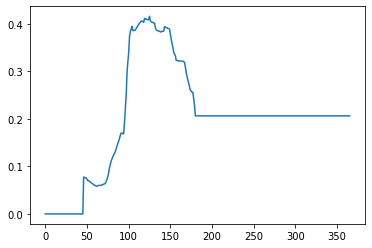

In [82]:
scale=c_c/b_c
pl.plot(scale[:,1,111])


In [83]:
c_c.shape

(366, 8, 143)

CO2 96.72915689726656 -27.102126201447174
CH4 359573.6384177322 -21271.1163306644
N2O 8447.624121561968 -656.1571669822239
SO2 95014.53397420618 -25151.01997427066
BC 4649.249786035137 -1152.602154132958
OC 11122.632294966532 -1536.0465699884412
CO 580122.1605053472 -164688.72557768226
NMVOC 141496.77562706347 -29396.41363361905
NH3 47720.5506568523 -1411.4048831206494
NOx 110327.50746752233 -39231.79029360267


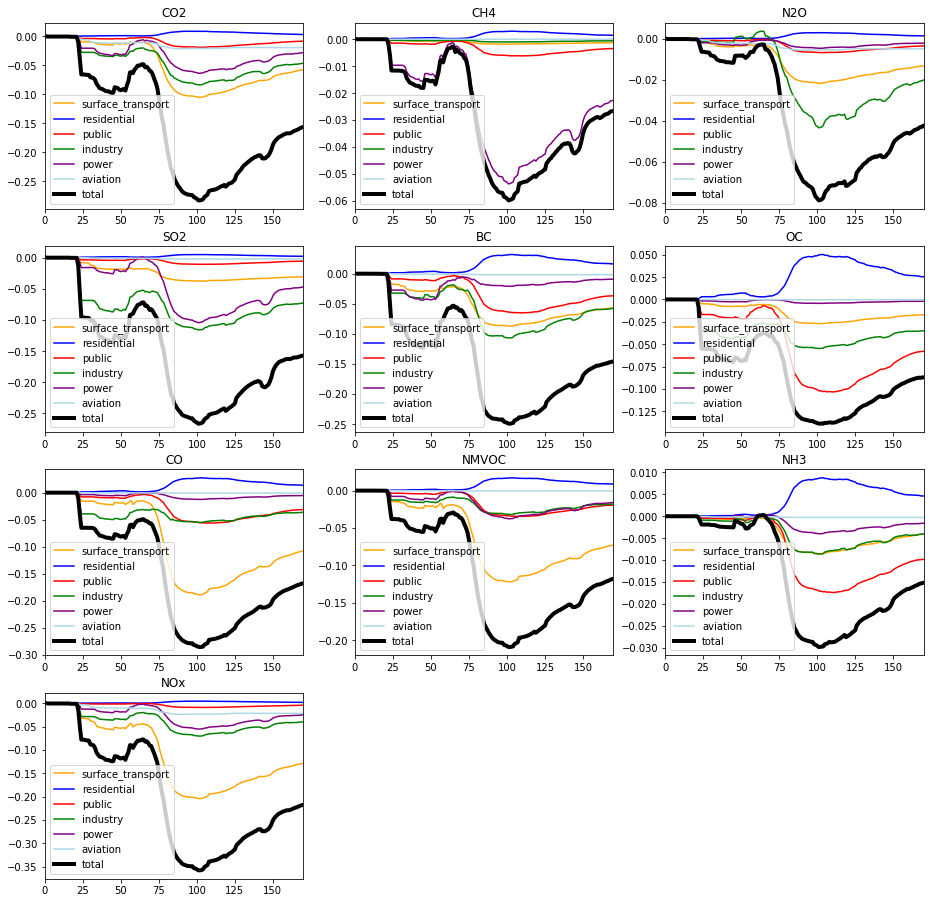

In [138]:
#sum over sectors and countries
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
ix=0
iy=0
c=0


glob_e=np.empty([366,10])
fig, ax = pl.subplots(4,3, figsize=(40/2.54, 40/2.54))
for isp in range(10):
    c=0
    totge=0.0
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl
        shis=gas[:,4]
        shisb=base[:,4] #intl
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        base[:,:]=0.0
        
        for ic in range(143):
            if df.iloc[ic]['Total']>=0: 
                totge=totge+df.iloc[ic]['Total']
      
#                big_c[:,8,ic,isp]=big_c[:,:,ic,isp].sum(axis=1)
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
#            if df.iloc[ic]['Surface_Transport']>=0 and np.all(b_c[0,:,ic]) >0:
            if df.iloc[ic]['Surface_Transport']>=0:
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
                c=c+1
#                print (ic,df.iloc[ic]['ISO_A3'],b_c[0,0,ic],b_c[0,4,ic], c_c[100,0,ic],b_c[100,4,ic])
                gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
                base[:,0]=base[:,0]+df.iloc[ic]['Total']             
                gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
                base[:,1]=base[:,1]+df.iloc[ic]['Total']
                gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
                base[:,2]=base[:,2]+df.iloc[ic]['Total']  
                gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
                base[:,3]=base[:,3]+df.iloc[ic]['Total']
                gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
                base[:,7]=base[:,7]+df.iloc[ic]['Total']
                gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
                base[:,6]=base[:,6]+df.iloc[ic]['Total']
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],ic,gas[80,6],df.iloc[ic]['Aviation']*c_c[80,6,ic])
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/100
        if isp !=8: gas[:,5]=df.iloc[143]['Total']*avis[:]/avisb[:] #no NH3 from planes
        if isp !=8: base[:,5]=df.iloc[143]['Total']
                
        gas[:,4]=df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=df.iloc[144]['Total']
        totge=totge+df.iloc[143]['Total']
        if isp !=8: totge=totge+df.iloc[143]['Total']
 
 
 
    b2=totge
    if isp ==0:
        b2=base[:,:].sum(axis=1)
#    print (isp,base[0,0]+base[0,5]+base[0,4],totge,(base[0,0]+base[0,5]+base[0,4])/totge)
    base[:,0]=b2
    
    ax[iy,ix].plot((gas[:,0]+gas[:,4])/base[:,0],color='orange',label='surface_transport')
    ax[iy,ix].plot(gas[:,1]/base[:,0],color='blue',label='residential')  
    ax[iy,ix].plot(gas[:,2]/base[:,0],color='red',label='public')
    ax[iy,ix].plot(gas[:,3]/base[:,0],color='green',label='industry') 
    ax[iy,ix].plot(gas[:,7]/base[:,0],color='purple',label='power')
#    ax[iy,ix].plot(gas[:,5]/base[:,5],color='purple')
    ax[iy,ix].plot((gas[:,6]+gas[:,5])/base[:,0],color='lightblue',label='aviation')
    ax[iy,ix].plot(gas[:,:].sum(axis=1)/base[:,0],color='black',linewidth=4,label='total')
    ax[iy,ix].set_title(spec[isp])
    ax[iy,ix].legend()
    ax[iy,ix].set_xlim(0,170)
    glob_e[:,isp]=gas[:,:].sum(axis=1)/base[:,0]
    print (spec[isp],base[0,0],gas[100,:].sum())
 
    ix=ix+1
    if ix==3:
        ix=0
        iy=iy+1
fig.delaxes(ax[iy,ix+1])
fig.delaxes(ax[iy,ix])
pl.savefig('FigS5.pdf')

OC 11274.943395935736 -1536.0465699884412
NOx 123579.74709503283 -39231.79029360267


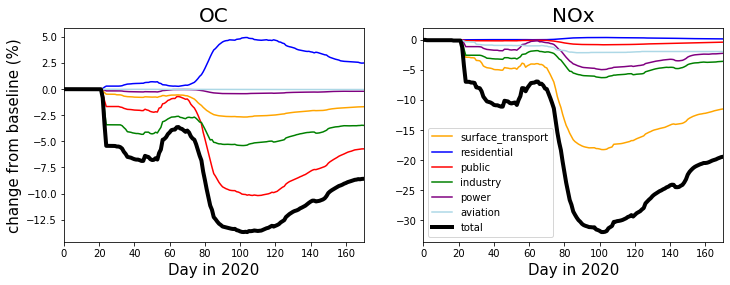

In [126]:
#sum over sectors and countries
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
ix=0
iy=0
c=0


#glob_e=np.empty([366,10])
fig, ax = pl.subplots(1,2, figsize=(30/2.54, 10/2.54))
for isp in range(10):
    c=0
    totge=0.0
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl
        shis=gas[:,4]
        shisb=base[:,4] #intl
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        base[:,:]=0.0
        
        for ic in range(143):
            if df.iloc[ic]['Total']>=0: 
                totge=totge+df.iloc[ic]['Total']
      
#                big_c[:,8,ic,isp]=big_c[:,:,ic,isp].sum(axis=1)
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
#            if df.iloc[ic]['Surface_Transport']>=0 and np.all(b_c[0,:,ic]) >0:
            if df.iloc[ic]['Surface_Transport']>=0: 
                c=c+1
#                print (ic,df.iloc[ic]['ISO_A3'],b_c[0,0,ic],b_c[0,4,ic], c_c[100,0,ic],b_c[100,4,ic])
                gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
                base[:,0]=base[:,0]+df.iloc[ic]['Total']             
                gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
                base[:,1]=base[:,1]+df.iloc[ic]['Total']
                gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
                base[:,2]=base[:,2]+df.iloc[ic]['Total']  
                gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
                base[:,3]=base[:,3]+df.iloc[ic]['Total']
                gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
                base[:,7]=base[:,7]+df.iloc[ic]['Total']
                gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
                base[:,6]=base[:,6]+df.iloc[ic]['Total']
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],ic,gas[80,6],df.iloc[ic]['Aviation']*c_c[80,6,ic])
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/100
        if isp !=8: gas[:,5]=df.iloc[143]['Total']*avis[:]/avisb[:] #no NH3 from planes
        if isp !=8: base[:,5]=df.iloc[143]['Total']
                
        gas[:,4]=df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=df.iloc[144]['Total']
        totge=totge+df.iloc[144]['Total']
        if isp !=8: totge=totge+df.iloc[143]['Total']
 
 
    if isp ==5 or isp==9:
        ix=1
        if isp==5: ix=0
        b2=totge
        if isp ==0:
            b2=base[:,:].sum(axis=1)
    #    print (isp,base[0,0]+base[0,5]+base[0,4],totge,(base[0,0]+base[0,5]+base[0,4])/totge)
        base[:,0]=b2

        ax[ix].plot(100*(gas[:,0]+gas[:,4])/base[:,0],color='orange',label='surface_transport')
        ax[ix].plot(100*gas[:,1]/base[:,0],color='blue',label='residential')  
        ax[ix].plot(100*gas[:,2]/base[:,0],color='red',label='public')
        ax[ix].plot(100*gas[:,3]/base[:,0],color='green',label='industry') 
        ax[ix].plot(100*gas[:,7]/base[:,0],color='purple',label='power')
    #    ax[iy,ix].plot(gas[:,5]/base[:,5],color='purple')
        ax[ix].plot(100*(gas[:,6]+gas[:,5])/base[:,0],color='lightblue',label='aviation')
        ax[ix].plot(100*gas[:,:].sum(axis=1)/base[:,0],color='black',linewidth=4,label='total')
        ax[ix].set_title(spec[isp],fontsize=20)
        if isp==9: ax[ix].legend(fontsize=10)
        ax[ix].set_xlim(0,170)
        ax[ix].set_xlabel('Day in 2020',fontsize=15)
        if ix==0: ax[ix].set_ylabel('change from baseline (%)',fontsize=15)
#        glob_e[:,sp]=gas[:,:].sum(axis=1)/base[:,0]
        print (spec[isp],base[0,0],gas[100,:].sum())
 


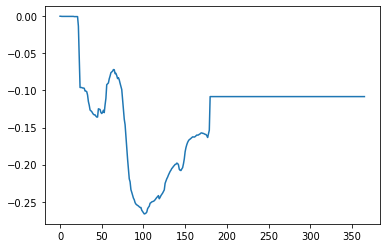

In [86]:
pl.plot(glob_e[:,3])

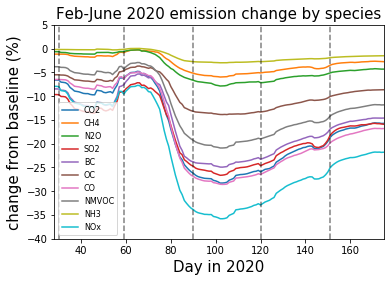

In [128]:
#plot emissions and forcing
fig, ax = pl.subplots(1,1, figsize=(15/2.54, 10/2.54))
for i in range(10):
    ax.plot(np.arange(366)+1,100*glob_e[:,i],label=spec[i])
ax.legend(fontsize=8)

days = [30, 59,90,120,151]
for day in days:
    ax.axvline(x=day, color='k', linestyle='--', alpha=0.5)
ax.set_xlim(28,175)
ax.set_ylim(-40,5)
ax.set_xlabel('Day in 2020',fontsize=15)
ax.set_ylabel('change from baseline (%)',fontsize=15)
ax.set_title('Feb-June 2020 emission change by species',fontsize=15)
pl.savefig('Fig2a.pdf')

0 96.72915689726656 96.72915689726656 1.0
1 131785.8475464364 360568.32370170375 0.3654948005234706
2 1860.0895264782084 8578.977957016432 0.21681947847376265
3 105777.75568898123 104267.77158532038 1.014481791263998
4 5025.877332933561 4953.779363757285 1.0145541341028947
5 8596.8825509891 11274.943395935736 0.7624767813990097
6 523360.91229152645 580706.3940212335 0.9012487509693061
7 106059.59335496077 146388.8486762511 0.7245059600784126
8 6431.234123927318 47694.54729135371 0.13484212534067186
9 120277.4685149407 123579.74709503283 0.9732781571599052


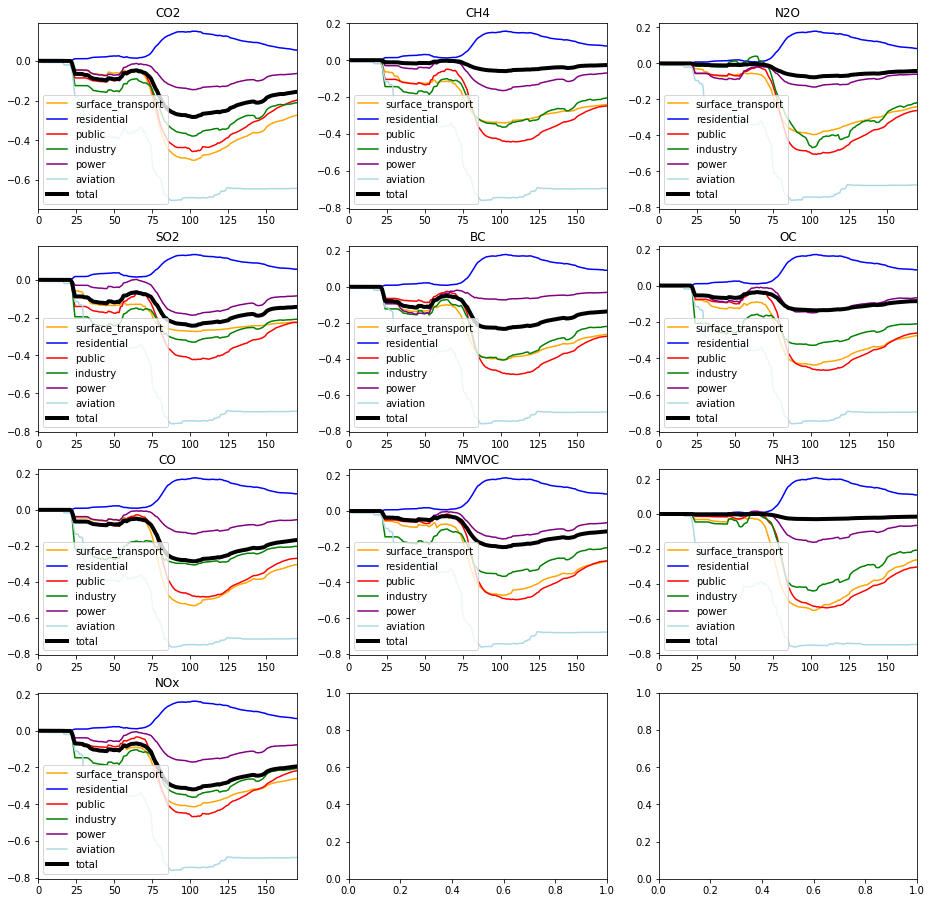

In [129]:
#sum over sectors and countries
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
ix=0
iy=0
c=0
#glob_e=np.empty([366,10])
fig, ax = pl.subplots(4,3, figsize=(40/2.54, 40/2.54))
for isp in range(10):
    c=0
    totge=0.0
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl
        shis=gas[:,4]
        shisb=base[:,4] #intl
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        base[:,:]=0.0
        
        for ic in range(143):
            if df.iloc[ic]['Total']>=0: 
                totge=totge+df.iloc[ic]['Total']
#                print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'],totge)
#            if df.iloc[ic]['Surface_Transport']>=0 and np.all(b_c[0,:,ic]) >0:
            if df.iloc[ic]['Surface_Transport']>=0: 
                c=c+1
#                print (ic,df.iloc[ic]['ISO_A3'],df.iloc[ic]['Surface_Transport']+df.iloc[ic]['Residential']+
#                      df.iloc[ic]['Public']+df.iloc[ic]['Industry']+df.iloc[ic]['Power']+df.iloc[ic]['Aviation'])
                gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
                base[:,0]=base[:,0]+df.iloc[ic]['Total']*df.iloc[ic]['Surface_Transport']/100             
                gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
                base[:,1]=base[:,1]+df.iloc[ic]['Total']*df.iloc[ic]['Residential']/100
                gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
                base[:,2]=base[:,2]+df.iloc[ic]['Total']*df.iloc[ic]['Public']/100
                gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
                base[:,3]=base[:,3]+df.iloc[ic]['Total']*df.iloc[ic]['Industry']/100
                gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
                base[:,7]=base[:,7]+df.iloc[ic]['Total']*df.iloc[ic]['Power']/100
                gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
                base[:,6]=base[:,6]+df.iloc[ic]['Total']*df.iloc[ic]['Aviation']/100
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],ic,gas[80,6],df.iloc[ic]['Aviation']*c_c[80,6,ic])
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/100
        if isp !=8: gas[:,5]=df.iloc[143]['Total']*avis[:]/avisb[:] #no NH3 from planes
        if isp !=8: base[:,5]=df.iloc[143]['Total']
                
        gas[:,4]=df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=df.iloc[144]['Total']
        totge=totge+df.iloc[144]['Total']
        if isp !=8: totge=totge+df.iloc[143]['Total']
    b2=totge
    if isp ==0:
        totge=base[0,:].sum()
    print (isp,base[0,:].sum(),totge,base[0,:].sum()/totge)
#    base[:,0]=b2
    ax[iy,ix].plot((gas[:,0]+gas[:,4])/(base[:,0]+base[:,4]),color='orange',label='surface_transport')
    ax[iy,ix].plot(gas[:,1]/base[:,1],color='blue',label='residential')  
    ax[iy,ix].plot(gas[:,2]/base[:,2],color='red',label='public')
    ax[iy,ix].plot(gas[:,3]/base[:,3],color='green',label='industry') 
    ax[iy,ix].plot(gas[:,7]/base[:,7],color='purple',label='power')
#    ax[iy,ix].plot(gas[:,5]/base[:,5],color='purple')
    ax[iy,ix].plot((gas[:,6]+gas[:,5])/(base[:,5]+base[:,6]),color='lightblue',label='aviation')
#    ax[iy,ix].plot(gas[:,:].sum(axis=1)/base[:,:].sum(axis=1),color='black',linewidth=4,label='total')
    ax[iy,ix].plot(gas[:,:].sum(axis=1)/totge,color='black',linewidth=4,label='total')
    ax[iy,ix].set_title(spec[isp])
    ax[iy,ix].legend()
    ax[iy,ix].set_xlim(0,170)
#    glob_e[:,isp]=gas[:,:].sum(axis=1)/base[:,0]
 
    ix=ix+1
    if ix==3:
        ix=0
        iy=iy+1

In [89]:
file='CH4_Corinne_Edgar.csv'
df=pd.read_csv(file)
df

,Unnamed: 0,ISO_A3,Name,Power,Industry,Surface_Transport,Public,Residential,Aviation,Total
0,0,ALB,Albania,5.433215,0.093990,0.161158,1.332771,0.787546,0.000000,117.436492
1,1,DZA,Algeria,78.994751,0.019446,0.111850,0.009102,0.050713,0.000094,3034.601362
2,2,AGO,Angola,67.349476,0.013028,0.097906,2.034599,1.640136,0.000303,1728.556541
3,3,ARG,Argentina,17.562772,0.070927,0.313092,0.075119,0.109014,0.000214,4944.937201
4,4,ARM,Armenia,16.264375,0.007745,1.328830,0.944408,1.993750,0.000000,96.177006
5,5,AUS,Australia,50.606789,0.086539,0.113707,0.124385,0.087801,0.000798,7933.638250
6,6,AUT,Austria,18.903490,0.664513,0.285168,1.370151,4.612842,0.000167,398.957654
7,7,AZE,Azerbaijan,50.408332,0.008350,0.071993,0.044512,0.158461,0.000536,758.283585
8,8,BHR,Bahrain,89.451621,0.420164,0.101279,0.000000,0.011692,0.000320,230.288700
9,9,BGD,Bangladesh,7.264265,0.020877,0.103934,0.919826,2.158776,0.000000,4853.238265


In [90]:
glob_e.shape

(366, 10)

In [91]:
#make data for Tom for ech gas: country, sector, emissions per sector, Julian day, % change
#CO2 Mt per day others are Gg per year. (kt) so divide by 366 to gt kt/day
#tom=pd.DataFrame(columns=)

In [92]:
print (28**0.5)

5.291502622129181


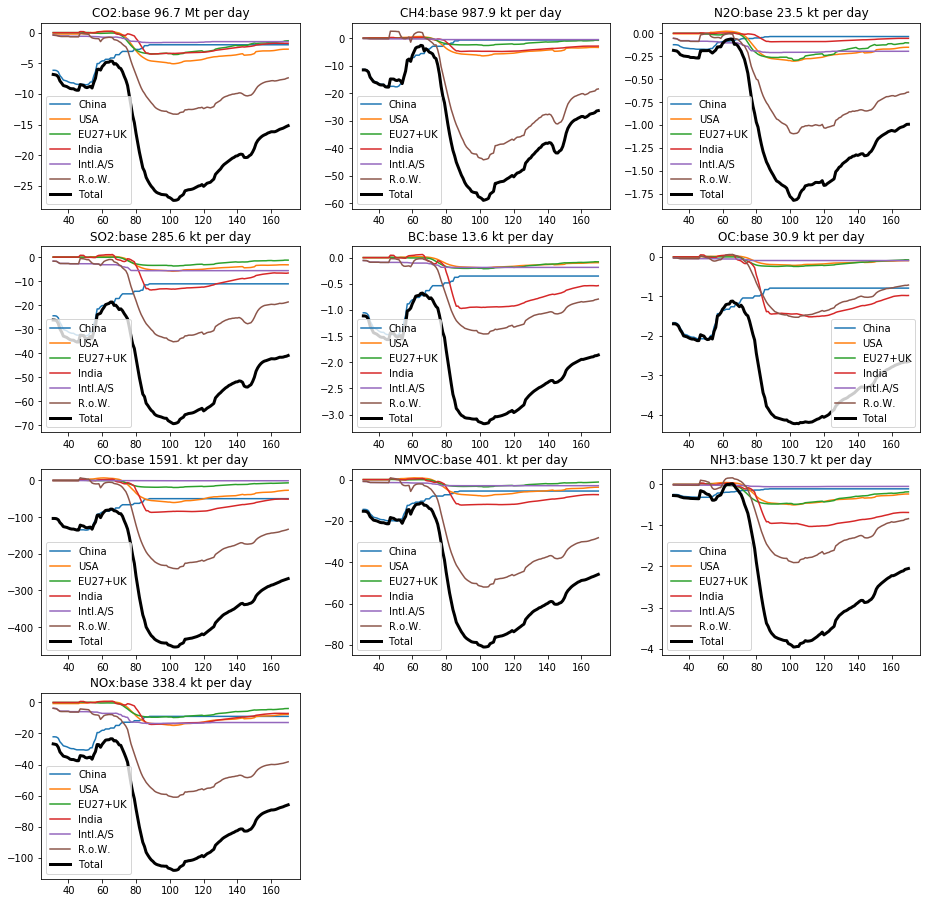

In [137]:
fig, ax = pl.subplots(4,3, figsize=(40/2.54, 40/2.54))
ix=0
iy=0
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
js=np.arange(120)
js =js.astype(str)
for isp in range(10):
    file='CH4_Corinne_Edgar.csv'
    df=pd.read_csv(file)
    cols=df['ISO_A3'].tolist()
    names=df['Name'].tolist()
    dftom=pd.DataFrame(data={'Type':['Name','Units','Base_em']+(np.arange(366)+1).tolist()})
    if isp ==0:
        gas= c_c.sum(axis=2)
        base=b_c.sum(axis=2)
        avis=gas[:,5]
        avisb=base[:,5] #intl air
        shis=gas[:,4]
        shisb=base[:,4] #intl shipping
        gas=c_c[:,0,:]+c_c[:,1,:]+c_c[:,2,:]+c_c[:,3,:]+c_c[:,6,:]+c_c[:,7,:]
        base=b_c[:,0,:]+b_c[:,1,:]+b_c[:,2,:]+b_c[:,3,:]+b_c[:,6,:]+b_c[:,7,:]
        for ist in range (143):
            dftom[cols[ist]]=[names[ist],'MtperdayCO2',base[0,ist]]+gas[:,ist].tolist()
        dftom['AIR']=[names[143],'MtperdayCO2',avisb[0]]+avis[:].tolist()
        dftom['SEA']=[names[144],'MtperdayCO2',shisb[0]]+shis[:].tolist()
    if isp > 0:
        file=spec[isp]+'_Corinne_Edgar.csv'
        df=pd.read_csv(file)
        gas=np.empty([366,8])
        gas[:,:]=0.0
        base=gas.copy()
        for ic in range(143):
            gas=np.empty([366,8])
            gas[:,:]=0.0
            base=gas.copy()
            base[:,:]
#            print('passing',ic,cc_code.iloc[ic],df.iloc[ic]['ISO_A3'])
#            if df.iloc[ic]['Surface_Transport']>=0:
#                print (ic,np.mean(c_c[:,4,ic]/b_c[:,4,ic]))
            gas[:,0]=gas[:,0]+df.iloc[ic]['Surface_Transport']*c_c[:,0,ic]/b_c[:,0,ic]*df.iloc[ic]['Total']/100
            base[:,0]=base[:,0]+100*df.iloc[ic]['Total']/100
            gas[:,1]=gas[:,1]+df.iloc[ic]['Residential']*c_c[:,1,ic]/b_c[:,1,ic]*df.iloc[ic]['Total']/100
            base[:,1]=base[:,1]+100*df.iloc[ic]['Total']/100
            gas[:,2]=gas[:,2]+df.iloc[ic]['Public']*c_c[:,2,ic]/b_c[:,2,ic]*df.iloc[ic]['Total']/100
            base[:,2]=base[:,2]+100*df.iloc[ic]['Total']/100  
            gas[:,3]=gas[:,3]+df.iloc[ic]['Industry']*c_c[:,3,ic]/b_c[:,3,ic]*df.iloc[ic]['Total']/100
            base[:,3]=base[:,3]+100*df.iloc[ic]['Total']/100
            gas[:,7]=gas[:,7]+df.iloc[ic]['Power']*c_c[:,7,ic]/b_c[:,7,ic]*df.iloc[ic]['Total']/100
            base[:,7]=base[:,7]+100*df.iloc[ic]['Total']/100
            gas[:,6]=gas[:,6]+df.iloc[ic]['Aviation']*c_c[:,6,ic]/b_c[:,6,ic]*df.iloc[ic]['Total']/100
            base[:,6]=base[:,6]+100*df.iloc[ic]['Total']/100 
#                print ('isp',ic,df.iloc[ic]['ISO_A3'],base[0,0],base[0,2],base[0,:].sum()/366)
#                gas[:,5]=gas[:,5]+df.iloc[ic]['Aviation']*avis[:]/avisb[:]*df.iloc[ic]['Total']/100
#                base[:,5]=base[:,5]+100*df.iloc[ic]['Total']/10
            base[:,:]=base[:,:]/365
            gas[:,:]=gas[:,:]/365
            dftom[cols[ic]]=[names[ic],'ktperday'+spec[isp],base[0,0]]+(gas[:,:]).sum(axis=1).tolist()

        gas[:,5]=gas[:,5]+df.iloc[143]['Total']*avis[:]/avisb[:]
        base[:,5]=base[:,5]+100*df.iloc[143]['Total']/100.0
        gas[:,4]=gas[:,4]+df.iloc[144]['Total']*shis[:]/shisb[:]
        base[:,4]=base[:,4]+100*df.iloc[144]['Total']/100.0
        base[:,:]=base[:,:]/366
        gas[:,:]=gas[:,:]/366
        dftom['AIR']=[names[143],'Ktperday'+spec[isp],base[0,5]]+gas[:,5].tolist()
        dftom['SEA']=[names[144],'Ktperday'+spec[isp],base[0,4]]+gas[:,4].tolist()
    #save file
    dftom.to_csv('2020_Emission_change_national'+spec[isp]+'_high_V3.csv')
#    if isp == 0: 
#        fempty
    EU28=['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST',
      'FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','MLT','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE', 'GBR']

   
    x=1+np.arange(366)
    lab=['China','USA','EU27+UK','India','Intl.A/S','R.o.W.']
    for i in range(6):
        if i==0:y=dftom.iloc[33:173]['CHN']
        if i==1:y=dftom.iloc[33:173]['USA']
        if i==2:y=dftom.iloc[33:173][EU28].sum(axis=1)
        if i==3:y=dftom.iloc[33:173]['IND']
        if i==4:y=dftom.iloc[33:173]['AIR']+dftom.iloc[33:173]['SEA']
        if i==5: 
            y=dftom.iloc[33:173,1:].sum(axis=1)-dftom.iloc[33:173][EU28].sum(axis=1)-dftom.iloc[33:173]['USA']-dftom.iloc[33:173]['IND']-dftom.iloc[33:173]['CHN']
        ax[iy,ix].plot(x[30:170],y,label=lab[i])
    ax[iy,ix].plot(x[30:170],dftom.iloc[33:173,1:].sum(axis=1),color='black',linewidth=3,label='Total')
    ax[iy,ix].legend(fontsize=10)
    tot=np.array2string(dftom.iloc[2,1:].sum(),precision=1)
    if isp==0: ax[iy,ix].set_title(spec[isp]+':base '+ tot+' Mt per day')
    if isp != 0: ax[iy,ix].set_title(spec[isp]+':base '+ tot+' kt per day')
    ix=ix+1
    if ix==3:
        ix=0
        iy=iy+1
fig.delaxes(ax[iy,ix+1])
fig.delaxes(ax[iy,ix])
pl.savefig('FigS4.pdf')


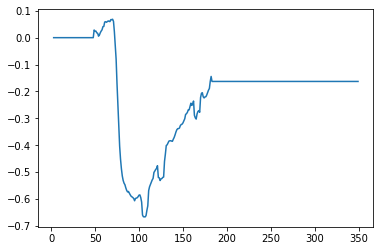

In [94]:
pl.plot(dftom.POL[3:350])

In [95]:
dftom.shape

(369, 146)

recession = 5.9% rebound from a 1.4% recession. out did recession and then added 4.5%.
December 2021. 1. 4.5% above baseline, 2 stays half low
December 2030.  no climate policy change, rebound policy (10% increase, moderrate green stimulus (36% decrease)
Start from 1 may: Jday 31+28+31+30+1, but take one off for position in array


In [96]:
#120
print (glob_e[365,:])
bdata=glob_e.copy()
bdata[:,:]=1
ge=pd.DataFrame(data=1+glob_e[:366,:],columns=spec)
be=pd.DataFrame(data=bdata[:366,:],columns=spec)
import datetime
dt=2020+0.5/366+np.arange(366)/366
ge['date']=dt
be['date']=dt

[-0.10955677 -0.01924842 -0.0299917  -0.10832908 -0.1008624  -0.06000497
 -0.11705603 -0.0826482  -0.01082646 -0.15026813]


In [97]:
#continue to  1 jan 2022
data=np.zeros(10)
data[:]=1
ge.loc['366']=(1+glob_e[365,:]).tolist()+[2022.0]
be.loc['366']=data.tolist()+[2022.0]

In [98]:
#add 1 jan 2023 for long blip
ge1=ge.copy()
ge1.loc['367']=(1+glob_e[365,:]/2).tolist()+[2023.0]
ge2=ge.copy()
data=np.zeros(10)
data[:]=1.045
ge2.loc['367']=data.tolist()+[2023.0]
data[:]=1
be.loc['367']=data.tolist()+[2023.0]
ge3=ge.copy()
data=np.zeros(10)
data[:]=1.0
ge3.loc['367']=data.tolist()+[2023.0]

In [99]:
#add DEc2030 and 2100
ge1_1=ge1.copy()
data=np.zeros(10)
data[:]=1.0
ge1_1.loc['368']=(data).tolist()+[2030.0]
#ge1_1.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge1_2=ge1.copy()
data=np.zeros(10)
data[:]=1.1
ge1_2.loc['368']=data.tolist()+[2030.0]
#ge1_2.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge1_3=ge1.copy()
data=np.zeros(10)
data[:]=0.64
ge1_3.loc['368']=data.tolist()+[2030.0]
#ge1_3.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge2_1=ge2.copy()
data=np.zeros(10)
data[:]=1.0
ge2_1.loc['368']=(data).tolist()+[2030.0]
#ge2_1.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge2_2=ge2.copy()
data=np.zeros(10)
data[:]=1.1
ge2_2.loc['368']=data.tolist()+[2030.0]
#ge2_2.loc['122']=(np.zeros(10)).tolist()+[2100.0]
ge2_3=ge2.copy()
data=np.zeros(10)
data[:]=0.64
ge2_3.loc['368']=data.tolist()+[2030.0]
#ge2_3.loc['122']=(np.zeros(10)).tolist()+[2100.0]

data[:]=1
ge3.loc['368']=data.tolist()+[2030.0]
#ge3.loc['122']=(np.zeros(10)).tolist()+[2100.0]
be.loc['368']=data.tolist()+[2030.0]
#be.loc['122']=(np.zeros(10)).tolist()+[2100.0]

In [100]:
ge2_2

,CO2,CH4,N2O,SO2,BC,OC,CO,NMVOC,NH3,NOx,date
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.001366
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.004098
2,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.006831
3,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.009563
4,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.012295
5,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.015027
6,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.017760
7,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.020492
8,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.023224
9,0.999710,0.999995,0.999880,0.999784,0.999853,0.999969,0.999990,0.999926,0.999999,0.999442,2020.025956


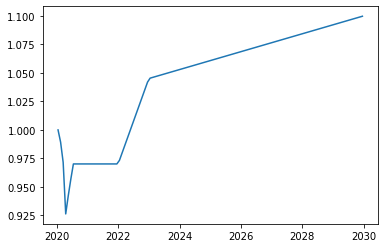

In [101]:
#interoplate
from scipy.interpolate import interp1d
import numpy as np
x=be.date
y=ge2_2.drop(['date'],axis=1).to_numpy()
fc = interp1d(x, y,axis=0,kind = 'linear')


xmonth=2020.0+0.5/12+np.arange(12*10)/12
ymonthge2_2=fc(xmonth)
xmonth.shape
y=ge1_3.drop(['date'],axis=1).to_numpy()
fc = interp1d(x, y,axis=0,kind = 'linear')
ymonthge1_3=fc(xmonth)
y=ge3.drop(['date'],axis=1).to_numpy()
fc = interp1d(x, y,axis=0,kind = 'linear')
ymonthge3=fc(xmonth)

pl.plot(xmonth[:],ymonthge2_2[:,2])

(0, 2)

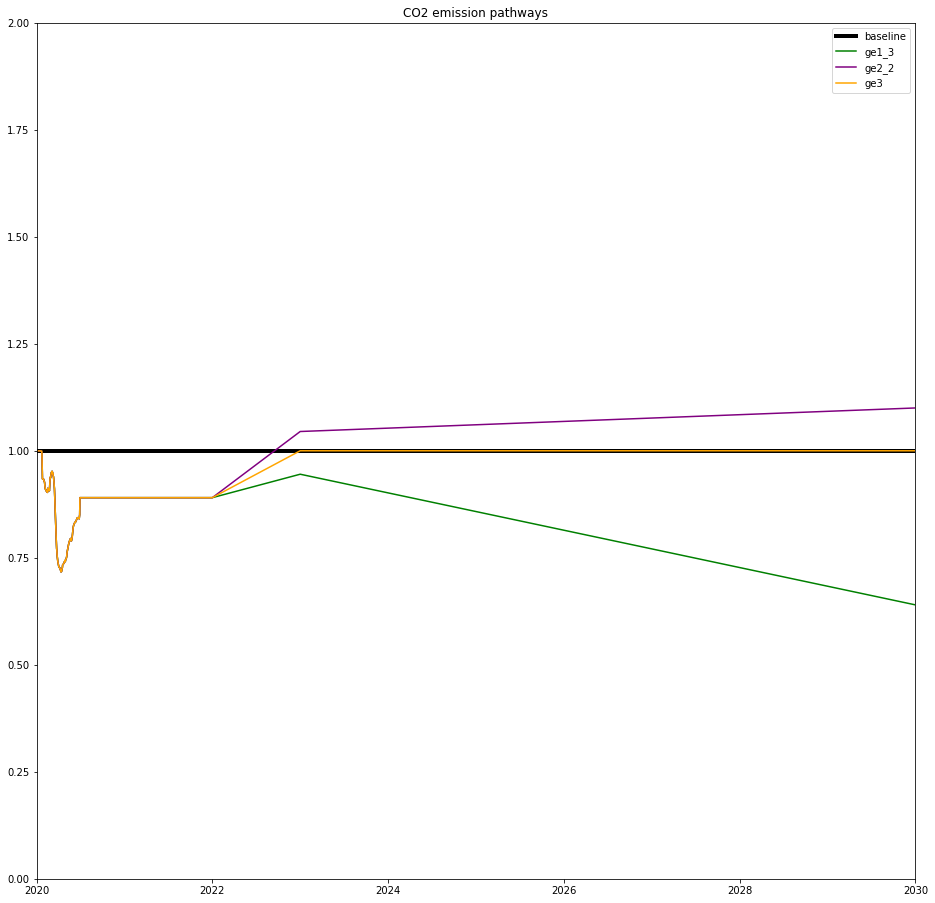

In [102]:
import matplotlib.pyplot as pl

fig, ax = pl.subplots(1,1, figsize=(40/2.54, 40/2.54))
ax.plot(be.date,be.CO2,label='baseline',color='black',linewidth=4)
#ax.plot(be.date,ge1_1.CO2*50,color='red',label='ge1_1')
#ax.plot(be.date,ge1_2.CO2*50,label='ge1_2',color='pink')
ax.plot(be.date,ge1_3.CO2,label='ge1_3',color='green')
#ax.plot(be.date,ge2_1.CO2*50,color='blue',label='ge2_1')
ax.plot(be.date,ge2_2.CO2,label='ge2_2',color='purple')
#ax.plot(xmonth,ymonth[:,0],label='inter',color='pink')
#ax.plot(be.date,ge2_3.CO2*50,label='ge2_3',color='lightblue')
ax.plot(be.date,ge3.CO2,label='ge3',color='orange')
ax.set_title('CO2 emission pathways')
ax.legend()
ax.set_xlim(2020.0, 2030)
ax.set_ylim(0, 2)

In [103]:
import numpy as np

import fair
import fair
fair.__version__
from fair.tools.magicc import scen_open
from fair.constants import molwt

#new data from joeri
emissions_ndc= scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/Baseline.SCEN') 
emissions_g2_2 = scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/FossilRecovery.SCEN') 
emissions_g1_3 = scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/GreenRecovery.SCEN') 
emissions_g4 = scen_open('/Users/earpmf/PYTHON/Piers-climate/data/SSP_emissions/StrongGreen.SCEN') 
#doesn't need scaling, from joeri




In [104]:
emissions_ndc[:,0]

array([1765., 1766., 1767., 1768., 1769., 1770., 1771., 1772., 1773.,
       1774., 1775., 1776., 1777., 1778., 1779., 1780., 1781., 1782.,
       1783., 1784., 1785., 1786., 1787., 1788., 1789., 1790., 1791.,
       1792., 1793., 1794., 1795., 1796., 1797., 1798., 1799., 1800.,
       1801., 1802., 1803., 1804., 1805., 1806., 1807., 1808., 1809.,
       1810., 1811., 1812., 1813., 1814., 1815., 1816., 1817., 1818.,
       1819., 1820., 1821., 1822., 1823., 1824., 1825., 1826., 1827.,
       1828., 1829., 1830., 1831., 1832., 1833., 1834., 1835., 1836.,
       1837., 1838., 1839., 1840., 1841., 1842., 1843., 1844., 1845.,
       1846., 1847., 1848., 1849., 1850., 1851., 1852., 1853., 1854.,
       1855., 1856., 1857., 1858., 1859., 1860., 1861., 1862., 1863.,
       1864., 1865., 1866., 1867., 1868., 1869., 1870., 1871., 1872.,
       1873., 1874., 1875., 1876., 1877., 1878., 1879., 1880., 1881.,
       1882., 1883., 1884., 1885., 1886., 1887., 1888., 1889., 1890.,
       1891., 1892.,

In [105]:
import numpy as np

In [106]:
timew=1765.0+0.5/12+ np.arange(286*12)/12
f1 = interp1d(emissions_ndc[:,0], emissions_ndc,axis=0,kind = 'linear')
f2 = interp1d(emissions_g2_2[:,0], emissions_g2_2,axis=0,kind = 'linear')
f3 = interp1d(emissions_g1_3[:,0], emissions_g1_3,axis=0,kind = 'linear')
f4 = interp1d(emissions_g4[:,0], emissions_g4,axis=0,kind = 'linear')

In [107]:
emissions_month_base = f1(timew)
emissions_month_g2_2 = f2(timew)
emissions_month_g1_3 = f3(timew)
emissions_month_g3 = f1(timew)
emissions_month_g4 = f4(timew)

In [108]:
spec=['CO2','CH4','N2O','SO2','BC','OC','CO','NMVOC','NH3','NOx']
#YEARS FossilCO2  OtherCO2 CH4 N2O SOx  CO NMVOC NOx BC  OC   NH3    
#CO2, then CH4 N2O SOx  CO NMVOCNOx BC  OC   NH3
np=range(255*12,255*12+120)
emissions_month_g2_2[np,1]=emissions_month_g2_2[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g2_2[np,2]=emissions_month_g2_2[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g2_2[np,3]=emissions_month_g2_2[np,3]*ymonthge3[:,1]#CH4
emissions_month_g2_2[np,4]=emissions_month_g2_2[np,4]*ymonthge3[:,2]#N2O
emissions_month_g2_2[np,5]=emissions_month_g2_2[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g2_2[np,6]=emissions_month_g2_2[np,6]*ymonthge3[:,6]#CO
emissions_month_g2_2[np,7]=emissions_month_g2_2[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g2_2[np,8]=emissions_month_g2_2[np,8]*ymonthge3[:,9]#NOx
emissions_month_g2_2[np,9]=emissions_month_g2_2[np,9]*ymonthge3[:,4]#BC
emissions_month_g2_2[np,10]=emissions_month_g2_2[np,10]*ymonthge3[:,5]#OC
emissions_month_g2_2[np,11]=emissions_month_g2_2[np,11]*ymonthge3[:,8]#NH3

emissions_month_g1_3[np,1]=emissions_month_g1_3[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g1_3[np,2]=emissions_month_g1_3[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g1_3[np,3]=emissions_month_g1_3[np,3]*ymonthge3[:,1]#CH4
emissions_month_g1_3[np,4]=emissions_month_g1_3[np,4]*ymonthge3[:,2]#N2O
emissions_month_g1_3[np,5]=emissions_month_g1_3[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g1_3[np,6]=emissions_month_g1_3[np,6]*ymonthge3[:,6]#CO
emissions_month_g1_3[np,7]=emissions_month_g1_3[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g1_3[np,8]=emissions_month_g1_3[np,8]*ymonthge3[:,9]#NOx
emissions_month_g1_3[np,9]=emissions_month_g1_3[np,9]*ymonthge3[:,4]#BC
emissions_month_g1_3[np,10]=emissions_month_g1_3[np,10]*ymonthge3[:,5]#OC
emissions_month_g1_3[np,11]=emissions_month_g1_3[np,11]*ymonthge3[:,8]#NH3

emissions_month_g3[np,1]=emissions_month_g3[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g3[np,2]=emissions_month_g3[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g3[np,3]=emissions_month_g3[np,3]*ymonthge3[:,1]#CH4
emissions_month_g3[np,4]=emissions_month_g3[np,4]*ymonthge3[:,2]#N2O
emissions_month_g3[np,5]=emissions_month_g3[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g3[np,6]=emissions_month_g3[np,6]*ymonthge3[:,6]#CO
emissions_month_g3[np,7]=emissions_month_g3[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g3[np,8]=emissions_month_g3[np,8]*ymonthge3[:,9]#NOx
emissions_month_g3[np,9]=emissions_month_g3[np,9]*ymonthge3[:,4]#BC
emissions_month_g3[np,10]=emissions_month_g3[np,10]*ymonthge3[:,5]#OC
emissions_month_g3[np,11]=emissions_month_g3[np,11]*ymonthge3[:,8]#NH3

emissions_month_g4[np,1]=emissions_month_g4[np,1]*ymonthge3[:,0]#CO2fossil
emissions_month_g4[np,2]=emissions_month_g4[np,2]*ymonthge3[:,0]#CO2other
emissions_month_g4[np,3]=emissions_month_g4[np,3]*ymonthge3[:,1]#CH4
emissions_month_g4[np,4]=emissions_month_g4[np,4]*ymonthge3[:,2]#N2O
emissions_month_g4[np,5]=emissions_month_g4[np,5]*ymonthge3[:,3]  #SOx
emissions_month_g4[np,6]=emissions_month_g4[np,6]*ymonthge3[:,6]#CO
emissions_month_g4[np,7]=emissions_month_g4[np,7]*ymonthge3[:,7]#NMVOC
emissions_month_g4[np,8]=emissions_month_g4[np,8]*ymonthge3[:,9]#NOx
emissions_month_g4[np,9]=emissions_month_g4[np,9]*ymonthge3[:,4]#BC
emissions_month_g4[np,10]=emissions_month_g4[np,10]*ymonthge3[:,5]#OC
emissions_month_g4[np,11]=emissions_month_g4[np,11]*ymonthge3[:,8]#NH3

(2008, 2051)

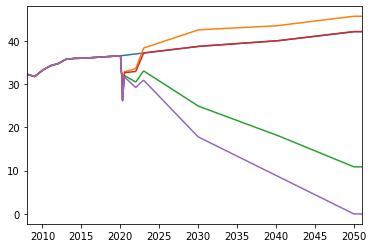

In [109]:
pl.plot(emissions_month_base[:,0],emissions_month_base[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g2_2[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g1_3[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g3[:,1]*3.7)
pl.plot(emissions_month_base[:,0],emissions_month_g4[:,1]*3.7)
pl.xlim(2008,2051)

In [110]:
import numpy as np
np.arange(70*12).shape

(840,)

(2005, 2060)

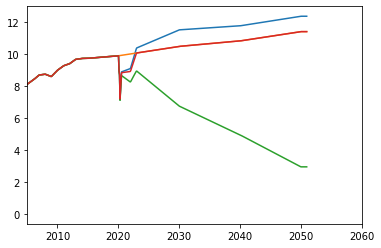

In [111]:
pl.plot(emissions_month_g2_2[:,0],emissions_month_g2_2[:,1])
pl.plot(emissions_month_g2_2[:,0],emissions_month_base[:,1])
pl.plot(emissions_month_g1_3[:,0],emissions_month_g1_3[:,1])
pl.plot(emissions_month_g1_3[:,0],emissions_month_g3[:,1])
pl.xlim(2005,2060)

In [112]:
import numpy as np
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g2_2',emissions_month_g2_2)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_base',emissions_month_base)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g1_3',emissions_month_g1_3)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g3',emissions_month_g3)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/emissions_ndc_month_g4',emissions_month_g4)

In [113]:
emissions_month_g2_2.shape

(3432, 40)

In [114]:
from fair.ancil import natural, cmip6_volcanic, cmip6_solar, historical_scaling
import numpy as np
n=natural.Emissions.emissions
n=n[:-50]
print(n[300,:])
x=np.arange(686)+1765.0
print (cmip6_volcanic.Forcing.volcanic.shape)
fcn = interp1d(x, n,axis=0,kind = 'linear')
fcs = interp1d(x,cmip6_solar.Forcing.solar[:-50] ,axis=0,kind = 'linear')
fcv = interp1d(x,cmip6_volcanic.Forcing.volcanic[:-50] ,axis=0,kind = 'linear')
xmonth=1765.0+0.5/12+np.arange(286*12)/12
fn = interp1d(x, n,axis=0,kind = 'linear')
fv = interp1d(x,cmip6_volcanic.Forcing.volcanic[:-50] ,axis=0,kind = 'linear')
fs = interp1d(x,cmip6_solar.Forcing.solar[:-50] ,axis=0,kind = 'linear')

natural_e=fn(xmonth)
solarf=fs(xmonth)
volcanicf=fv(xmonth)
volcanicf.shape

[190.5807   8.9883]
(736,)


(3432,)

In [115]:
natural_e.shape

(3432, 2)

In [116]:
import numpy as np
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [117]:
natural_e.shape

(3432, 2)

In [118]:
solarf.shape

(3432,)

In [119]:
solarf[:]=0
volcanicf[:]=0

In [120]:
np.save('/Users/earpmf/PYTHON/Piers-climate/data/solarf_month',solarf)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/volcanicf_month',volcanicf)
np.save('/Users/earpmf/PYTHON/Piers-climate/data/naturale_month',natural_e)

In [121]:
+2100-1765

335

(2010, 2075)

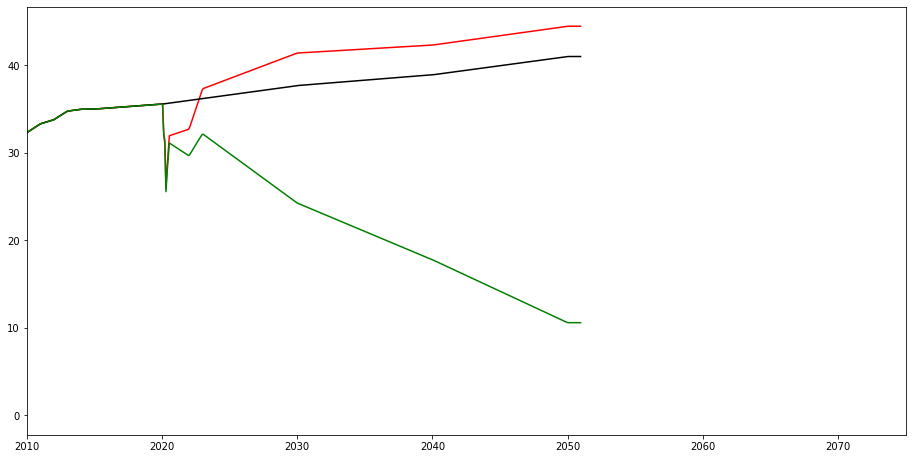

In [122]:

fig, ax = pl.subplots(1,1, figsize=(40/2.54, 20/2.54))
i=1
ax.plot(emissions_month_g2_2[:,0],emissions_month_g2_2[:,i]*3.6,color='red')
ax.plot(emissions_month_base[:,0],emissions_month_base[:,i]*3.6,color='black')
ax.plot(emissions_month_g2_2[:,0],emissions_month_g1_3[:,i]*3.6,color='green')

ax.set_xlim(2010,2075)
